# GML - Mini-Challenge 3 - FS 2022

**Ausgabe:** Montag, 23. Mai 2022  
**Abgabe:** Sonntag, 12. Juni 2022, bis 24 Uhr 

In diesem Mini-Challenge untersuchen wir die Struktur eines Datensatzes von Sonnenspektren.  

Cédric Huwyler hat uns freundlicherweise die Daten dafür bereitgestellt. Es handelt sich dabei um Daten gesammelt von der Nasa Iris Mission: https://iris.lmsal.com/  

Du findest etwas mehr Kontext auf folgender DS-Spaces Seite: https://ds-spaces.technik.fhnw.ch/iris-centroid-browser/  

#### Vorgaben zu Umsetzung und Abgabe

- Code muss in python geschrieben werden.
- Wir entwickeln die meisten Algorithmen selber. Wenn nicht explizit anders verlangt, dürfen bloss die folgenden Bibliotheken verwendet werden: numpy, matplotlib, seaborn, pandas
- Der Code muss lauffähig sein bei Ausführung im Docker-Container des Trainingcenters. 
- Es darf kein Code ausgelagert werden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Titel, Colorbar, ..), sodass der Plot einfach verstanden werden kann.
- Zu jedem Plot gibt es eine kurze Diskussion, welche den Plot erklärt und die wichtigsten Einsichten die damit sichtbar werden festhält.  
- Als **Abgabe** zählt der letzte Commit in deinem Fork des Repos vor Abgabetermin.  


- **Bitte löschen, duplizieren oder verschieben sie die vorhandenen Zellen nicht**. Dies führt zu Problemen bei der Korrektur. Sie dürfen aber beliebig viele weitere Zellen hinzufügen.
- Bitte importiere Daten mit **relativen Pfaden** innerhalb des Repos.

Für die Erarbeitung der Inhalte darf zusammengearbeitet werden. Die Zusammenarbeit ist dabei aber auf algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text von anderen oder vom Internet kopiert werden.**

---

### Aufgabe 1 (4 Punkte)

Lade den Datensatz der Sonnenspektren von folgendem Link herunter ( https://drive.switch.ch/index.php/s/SfcNAisJNpTxCrh ) und füge ihn dem `data`-Verzeichnis in diesem Repo zu (der Datensatz soll nicht committed und gepushed werden). Lade dann (`data/iris_sun_spectra.npy`) mit der Funktion `np.load`. Verwende einen relativen Pfad.

Der Wellenlängenbereich der Spektren ist 279.414 nm - 280.572 nm. Die Intensität der Spektren ist auf 1 normiert.  

Visualisiere einige (~ 100) zufällige Beispiele nebeneinander in einer Figure in Subplots und beschreibe was du vorfindest.

**Daten einlesen**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# YOUR CODE HERE
df_iris = np.load('../../data/iris_sun_spectra.npy')
print(df_iris.shape)
#df_iris[0, :]

(791537, 240)


**Visualisieren 100 Beispiele**

df_plot_100.shape=(100, 240)


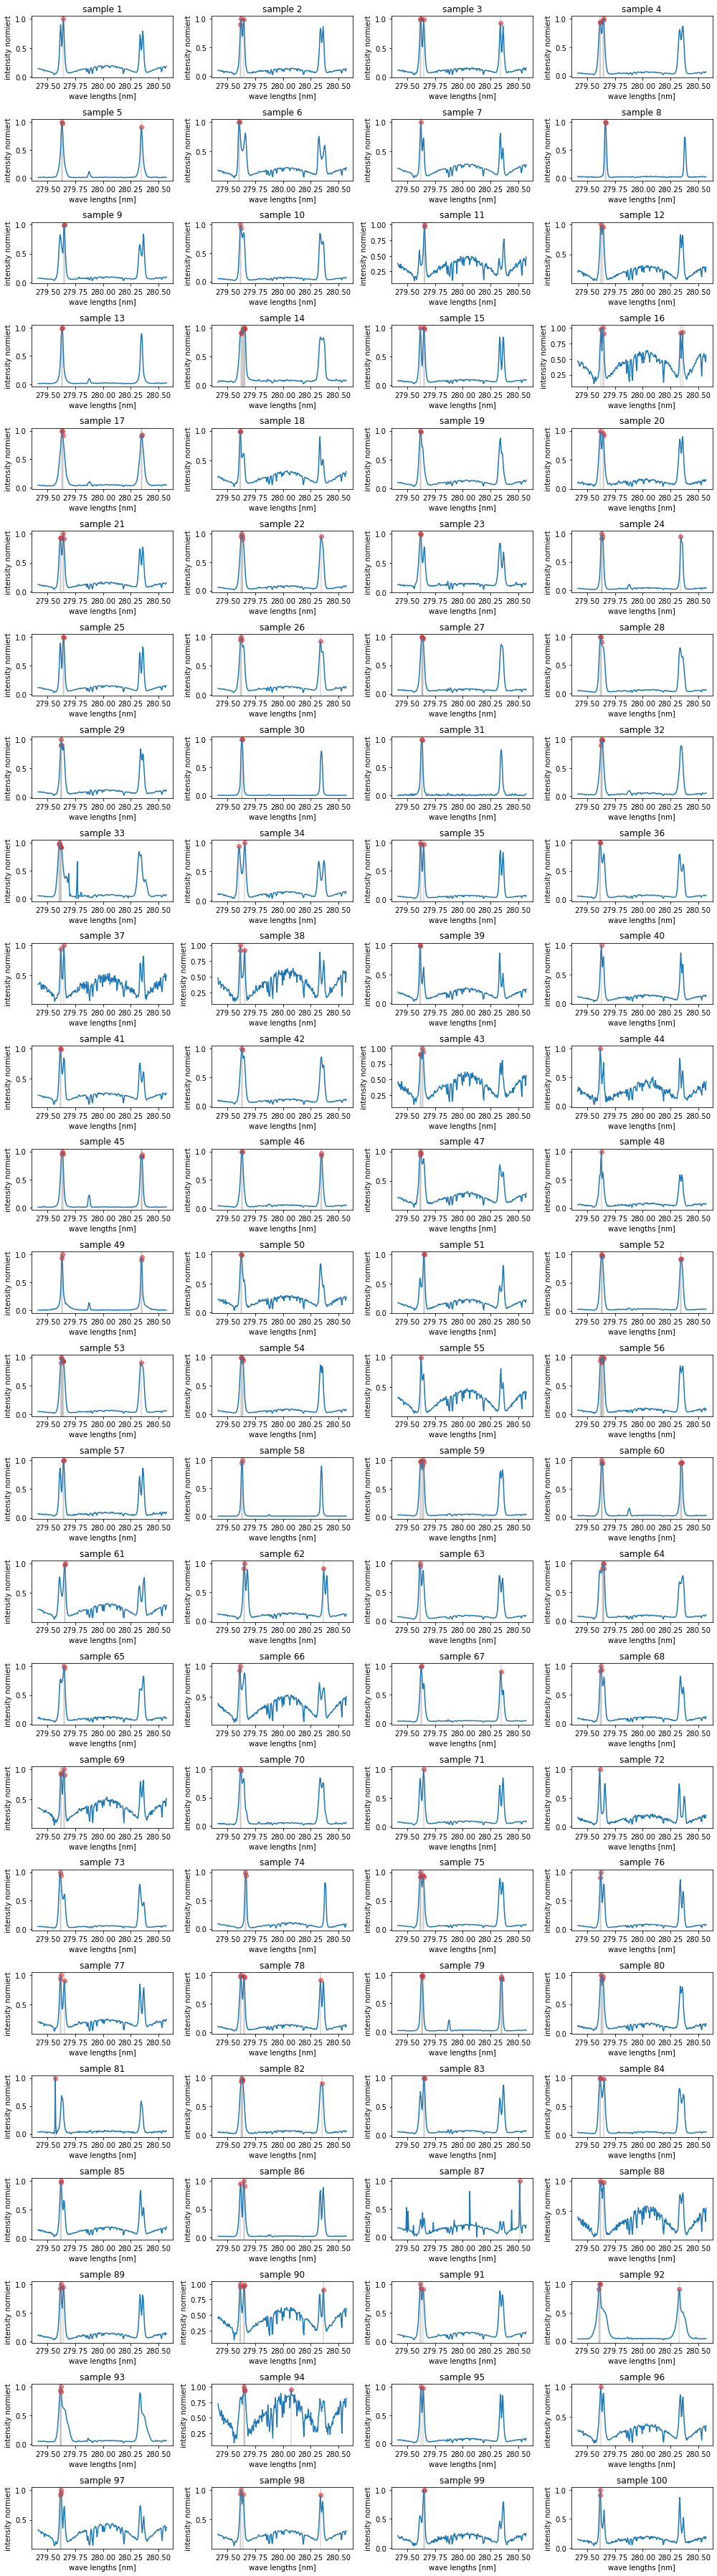

In [3]:
np.random.seed(42)

# 100 zufällige Beispiele auswählen
idx_rnd = np.random.randint(0, df_iris.shape[0], 100)
df_plot_100 = df_iris[idx_rnd, :].copy()
print(f'{df_plot_100.shape=}')

# plote die zufälligen Beispiele
fig, ax = plt.subplots(25, 4, figsize=(14,50))
ax = ax.flatten()

# Wellenlänge zwischen 279.414nm und 280.572nm, verwende linspace für 240 Punkte dazwischen
x_label = np.linspace(279.414, 280.572, 240)

for i, data in enumerate(df_plot_100):
    ax[i].plot(x_label, df_plot_100[i, :])
    ax[i].set_title(f'sample {i+1}')
    ax[i].set_xlabel('wave lengths [nm]')
    ax[i].set_ylabel('intensity normiert')
    
    # zeichnen Picks grösser 0.8
    for k, point in enumerate(data):
        if point > 0.9:
            ax[i].scatter(x_label[k], point, color='red', alpha=0.5)
            ax[i].axvline(x_label[k], color='gray', alpha=0.3)
    
plt.tight_layout()
plt.show()

In allen Samples fallen die zwei Picks, bei denen die Intensität auf nahe zu 1 springt, als Muster auf. Zudem gibt es zwischen diesen Picks in vielen Fällen ein Aufstieg und Abfallen der Intensität wobei die maximale Stärke der Intensität unterschiedlich sein kann. Dieses Muster kann auch unterhalb und oberhalb der gemessenen Wellenlänge beobachtet werden

### Aufgabe 2 (8 Punkte)

Schreibe eine Klasse, analog einer Transformer-Klasse in scikit-learn, welche die Principal Components mittels Singular Value Decomposition berechnet.  
Für einen beliebigen Datensatz sollen dabei alle möglichen Principal Components berechnet werden.  

Nach Ausführen der `fit`-Methode, soll ein Objekt die Attribute `components_` und `variance_` aufweisen, welche die Principal Components als Zeilenvektoren, bzw. die Varianz des Datensatzes entlang der Komponenten ausweist.  

Konstruiere und visualisiere ein einfaches 2-dimensionales Beispiel mit welchem du zeigst, dass deine Klasse wie erwartet funktioniert. Zeige insbesondere, dass die erste Principal Component tatsächlich in Richtung der grössten Varianz zeigt und dass die Berechnung der Varianzen entlang der Principal Components berechnet stimmen. Erkläre diese Verifikation der Funktionstüchtigkeit.

In [4]:
import numpy as np
import scipy as sp

class PCA():
    '''
    Berechnet die Pricipal Componets mit SVD eines Datensatzes
    
    '''
    def __init__(self, n_components=None):
        '''
        df: Datendatz für PCA berechnung
        '''
        self.n_components = n_components
        #self.X = np.array([])
        self.U_ = np.array([])
        self.S_ = np.array([])
        self.VT_ = np.array([])
        self.components_ = np.array([])
        self.variance_ = np.array([])    
        self.eigvals_ = np.array([])
        
    def fit(self, X, print_info=False):
        '''     
        output: components_ als Zeilenvektor und variance_ entlang PC
        '''
        # Singulärwertzerlegung
        self.U_, self.S_, self.VT_ = np.linalg.svd(X)
        #self.U_, self.S_, self.VT_ = sp.linalg.svd(X) 
        
        # Eigenwerte sind die quadrierten singulärwerte aus der Matrix S
        self.eigvals_ = np.square(self.S_)
        
        # Componenten erstellen, PC = X_norm @ VT oder PC = U @ S
        #print(X.shape, self.VT_.shape)
        self.components_ = X @ self.VT_
        self.components_ = (self.VT_ @ X.T).T
        #print(self.components_)
        
        
        #print(self.U_.shape, self.S_.shape)
        #S_matrix = np.diag(self.S_[:k_components]) 
        #self.components_ = self.U_[:, :len(self.S_)] @ S_matrix
        #print(self.components_)
        
        # Berechne varianz durch die Eigenwerte, Eigenwert / Summe aller Eigenwerte
        # S aus der Funktion svd ist bereits sortiert
        self.variance_ = self.eigvals_ / np.sum(self.eigvals_)   
        
        if print_info:
            print(f'{self.variance_=}')   
            print(f'sing. Werte: {S=}')
        
        return self
        
        
    def fit_transform(self, X, k_components=None, var_proz=None):
        '''
        output: df_reduced,berechnet PCA und reduziert die Daten
        '''
        # Singulärwertzerlegung
        self.U_, self.S_, self.VT_ = np.linalg.svd(X)  
        
        # Eigenwerte sind die quadrierten singulärwerte aus der Matrix S
        self.eigvals_ = np.square(self.S_)
        
        # Berechne varianz durch die Eigenwerte, Eigenwert / Summe aller Eigenwerte
        self.variance_ = self.eigvals_ / np.sum(self.eigvals_) 
        
        if(k_components == None) & (var_proz == None):
            raise ValueError('set either k_components or var_proz') 
    
        if k_components != None:
            S_matrix = np.diag(self.S_[:k_components])    
            U = self.U_[:, :k_components]
            VT = self.VT_[:k_components, :]
        
            print('VT: ', VT.shape, 'X.T: ', X.T.shape )
            #self.components_ = X @ self.VT_
            self.components_ = (VT @ X.T).T
        
        if var_proz != None:
            # berechne notwendige k-komponetns
            k_comp = self.calc_var_proz(X, var_proz)
            print(f'{k_comp} Komponenten notwendig für >= {var_proz}')
            
            S_matrix = np.diag(self.S_[:k_comp])    
            U = self.U_[:, :k_comp]
            VT = self.VT_[:k_comp, :]
                    
            #print(X.shape, self.VT_.shape)
            self.components_ = (VT @ X.T).T
            
        return self.components_   
    
    def calc_var_proz(self, X, limit_prozent):
        '''
        Berechnet die Anzahl notwendigen Komponenten um eine bestimmte Varianz zu behalten
        '''
        _, S, _ = np.linalg.svd(X)
        
        eig_vals = np.square(S)
        
        variance = eig_vals / np.sum(eig_vals)
        #print(variance)
        
        for k in range(1, len(variance)+1):
            var_proz = np.sum( variance[:k] )
            #print(f'{var_proz=}')
            
            if var_proz > limit_prozent:
                return k
        return len(variance)
            
    @staticmethod
    def normalize(X):
        X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
        return X_norm
    
    def plot_variance_explained(self, k_comp=10, limit=0.95, cumsum=True, figsize=(20,6)):
        '''
        Zeichnet die prozuentale Variance explained mit oder ohne cumsum
        '''
        fig = plt.figure(figsize=figsize)
        
        # zeichen Variance
        x_label = ['pc' + str(i+1) + ', ' + str(var.round(3)) for i, var in enumerate(self.variance_)]
        
        print(len(x_label), len(self.variance_))

        plt.bar(x_label[:k_comp], self.variance_[:k_comp])
        if cumsum:
            plt.scatter(np.arange(k_comp), np.cumsum(self.variance_[:k_comp]), color='red', label='cumsum(variance)')
            plt.legend(loc='center right')
        plt.ylim(0, 1)
        plt.axhline(limit, color='red', alpha=0.3)
        plt.xticks(rotation=90)
        plt.xlabel('Principal Components')
        plt.ylabel('% of variance explained')
        plt.grid()
        plt.show()
        
    def rekonstruktion(self, X_reduced=None):
        pass
        

In [5]:
a = np.array([1,2,3,4]).reshape(-1,1)
b = np.array([1,1,1,1]).reshape(-1,1).T

a @ b

array([[1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3],
       [4, 4, 4, 4]])

**Einfaches 2-d Beispiel test**

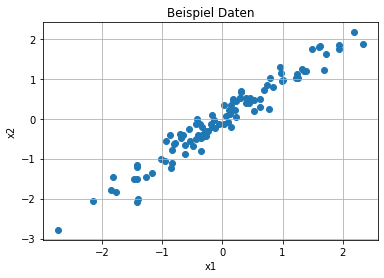

In [6]:
# Random Datensatz aus Aufgabenstellung
np.random.seed(42)
mu, sigma, n = 5, 3, 100
x1 = np.random.normal(mu, sigma, size=n)
# y mit zusätzliches Rauschen
x2 = 3*x1 + np.random.normal(0, 2, n)

# Standardisierung der Daten
X_sample = np.vstack([x2, x1]).T
X_sample_norm = PCA.normalize(X_sample)

# zeichnen der Beispieldaten
plt.scatter(X_sample_norm[:,0],  X_sample_norm[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Beispiel Daten')
plt.grid()
plt.show()

**Zeigen das PCA funktioniert**  
Die Klasse PCA() berechnet mit Singulätwertzerlegung die Eigenwerte und Eigenvektoren der Covarianzmatrix von X_sample_norm. Die Daten sollen in Standardisierter Form vorliegen (PCA hat eine Funktion dafür). Components gibt die Eigenvektoren zurück und variance die prozuentale Erklärung der Daten durch die einzelnen Components

In [7]:
# Erstelle Objekt
pca = PCA()

# fit methode
pca.fit(X_sample_norm, print_info=False)

**Zeigen dass die grösste PC entlang der grössten Varainz zeigt**  
components oder loading scores beschreiben die Eigenvektoren der Covarianz Matrix (SVD() -> Matrix V).  
In den Beispieldaten enthalten sind zwei Attribute x1 und x2 beide erhalten einen Eigenvektor der entlang der grössten Varianz der Daten zeigt. Für die PCA kann die Achsen anhand der Eigenvektoren gedreht werden.

In [8]:
print('Eigenwerte:')
print(pca.eigvals_)
print('Principal Components:')
print(pca.components_[:5,:])

Eigenwerte:
[197.26569083   2.73430917]
Principal Components:
[[-0.69092862 -0.24898488]
 [ 0.13137525 -0.07750935]
 [-1.11515628 -0.06104119]
 [-2.40800929 -0.1381499 ]
 [ 0.2364848  -0.03254675]]


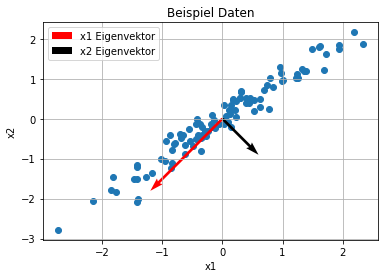

In [9]:
# zeichnen der Beispieldaten mit den Eigenvektoren x1 und x2
origin = (0,0)

plt.scatter(X_sample_norm[:,0],  X_sample_norm[:,1])
plt.quiver(*origin, pca.VT_[0][0], pca.VT_[0][1], width=0.008, scale_units='xy', scale=0.5, color='red', label='x1 Eigenvektor')
plt.quiver(*origin, pca.VT_[1][0], pca.VT_[1][1], width=0.008, scale_units='xy', scale=1, color='black', label='x2 Eigenvektor')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Beispiel Daten')
plt.legend()
plt.grid()
plt.show()

**Zeigen der prozuentalen Erklärung der Varianz** je Prinzipal Component  
pc1 erklärt hier rund 89% der Variation der Daten pc2 die restliche Variation von 11%.

2 2


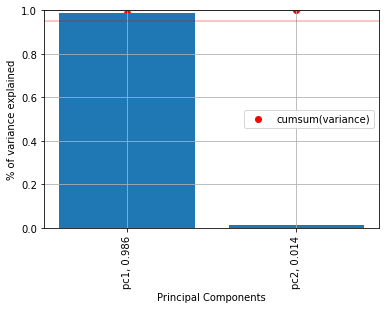

In [10]:
# zeichen Variance
pca.plot_variance_explained(k_comp=2, limit=0.95, figsize=(6,4))

**Zeigen das PCA in Richtung der grössten Varianz entlang PCA berechnet wird**  
Durch die Funktion U, S, V = np.linalg.svd(X) werden die Eigenwerte in S und die Eigenvektoren in V bereits nach den grössten Eigenwerten (oder wichtigste Prinzipal Componenten) sortiert. Wird das Produkt aus den Eigenvektoren mit den X Daten verrechnet wird eine Drehung der Daten entlang der wichtigsten PC erstellt. In unserem Fall entspricht dies x1 aus den Beispieldaten die auf der x-achse mit pc1 abgebildet sind und die höchste Variation der Daten zeigt. Die zweit wichtigste PC landet auf der y-achse in pc2. Bei höheren Dimension gilt das gleiche Muster.

VT:  (2, 2) X.T:  (2, 100)


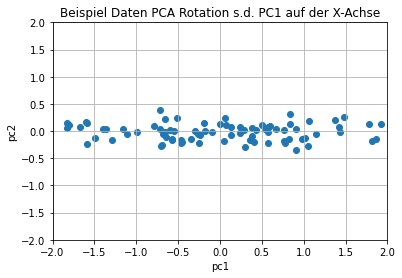

In [11]:
# PCA Analysis
# Drehen der Daten mit den Eigenvektoren
PCA_out = pca.fit_transform(X_sample_norm, 2)

#zeichne der Daten entlang der grössten Principal Komponente
plt.scatter(PCA_out[:,0],  PCA_out[:,1])
plt.ylim(-2, 2)
plt.xlim(-2, 2)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('Beispiel Daten PCA Rotation s.d. PC1 auf der X-Achse')
plt.grid()
plt.show()

VT:  (1, 2) X.T:  (2, 100)


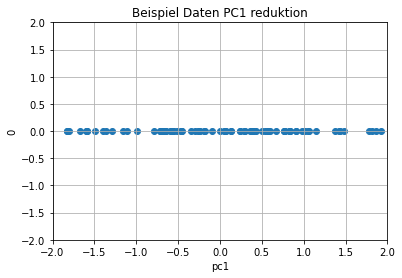

In [12]:
# PCA Analysis
# Drehen der Daten mit den Eigenvektoren
PCA_out = pca.fit_transform(X_sample_norm, 1)

#zeichne der Daten entlang der grössten Principal Komponente
plt.scatter(PCA_out[:,0],  np.zeros(len(PCA_out)))
plt.ylim(-2, 2)
plt.xlim(-2, 2)
plt.xlabel('pc1')
plt.ylabel('0')
plt.title('Beispiel Daten PC1 reduktion')
plt.grid()
plt.show()

Neben der .fit() Methode ist in der Klasse PCA() auch eine .fit_transform() Methode für eine direkte Matrix Reduktion verfügbar. Es können die Anzahl verwendeter Komponenten übergeben werden oder eine mindest Anforderung an die prozuentale Erklärung der Daten gefordert werden. Übliche Werte liegen so zwischen 0.9 - 0.99.

In [13]:
# fit transform für reduzierte matrix nach Anzahl Komponenten 
X_reduced = pca.fit_transform(X_sample_norm, 2)
print()
print(f'% variance explained: {pca.variance_}')
print(f'Eigenwerte: {pca.eigvals_}')
print(f'Eigenvektoren: {pca.VT_}')

VT:  (2, 2) X.T:  (2, 100)

% variance explained: [0.98632845 0.01367155]
Eigenwerte: [197.26569083   2.73430917]
Eigenvektoren: [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [14]:
# Original Data
X_sample_norm[:5,:]

array([[ 0.31250141,  0.66461921],
       [-0.14770371, -0.03808894],
       [ 0.74537193,  0.83169721],
       [ 1.60503297,  1.80040643],
       [-0.19023403, -0.14420598]])

In [15]:
# Reduced Data
X_reduced[:5,:]

array([[-0.69092862, -0.24898488],
       [ 0.13137525, -0.07750935],
       [-1.11515628, -0.06104119],
       [-2.40800929, -0.1381499 ],
       [ 0.2364848 , -0.03254675]])

In der Matrix X_reduced ist ersichtlich dass die Werte der wichtigsten PC (pc1) erhalten bleibt, pc1 kann 89% der Daten Variation erklären.

**Testen ob PCA von sklearn zum selben Ergebniss kommt**

In [16]:
import numpy as np
from sklearn.decomposition import PCA as PCA_sklearn

# Berechnung der Varianz und Eigenwerte
pca_sklearn = PCA_sklearn()
pca_sklearn.fit(X_sample_norm)
print(f'% variance explained: {pca_sklearn.explained_variance_ratio_}')
print(f'Eigenwerte: {pca_sklearn.singular_values_}')
print(f'Eigenvektoren: {pca_sklearn.components_}')

% variance explained: [0.98632845 0.01367155]
Eigenwerte: [14.0451305   1.65357466]
Eigenvektoren: [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [17]:
pca_sklearn = PCA_sklearn(n_components=2)
pca_sklearn.fit_transform(X_sample_norm)[:5]

array([[-0.69092862, -0.24898488],
       [ 0.13137525, -0.07750935],
       [-1.11515628, -0.06104119],
       [-2.40800929, -0.1381499 ],
       [ 0.2364848 , -0.03254675]])

**Test PCA eigene Klasse im Vergleich zu PCA Sklearn**  
Die Resultate sind identisch, somit geprüft das die Berechnungen korrekt sind.

### Aufgabe 3 (6 Punkte)

Zeige (analytisch), dass die Principal Components die Eigenvektoren der Kovarianzmatrix eines Datensatzes sind. Was sind die Eigenwerte?  

Lies das Kapitel von Jolliffe (Jolliffe, Principal Component Analysis, Springer, 2002) im Verzeichnis Literatur in diesem Repo für Inspiration.  

Erkläre was dies bedeutet.

YOUR ANSWER HERE

### Aufgabe 4 (11 Punkte)

Berechne die Principal Components des Datensatzes der Sonnenspektren.  

Zeichne die kumulative Summe der Varianzen entlang der aufsteigenden Principal Components.  

Wieviele Components brauchen wir, um 95 % der Varianz des Datensatzes zu erhalten?  
Rekonstruiere die Spektren aus diesen $K$ Components und zeichne Original und Rekonstruktion für 100 Beispiele in den gleichen Plot.  

Zeichne die $K$ Principal Components.  

Projiziere die Spektren auf die ersten beiden Principal Components und visualisiere die Spektren im neuen Koordinatensystem.  

Diskutiere sämtliche Plots.

In [18]:
# YOUR CODE HERE
#pca_iris = PCA().fit(df_iris)

In [19]:
np.random.seed(42)

# 500 zufällige Beispiele auswählen
idx_rnd = np.random.randint(0, df_iris.shape[0], 500)
df_iris_5k = df_iris[idx_rnd, :].copy()
print(f'{df_iris_5k.shape=}')

df_iris_5k.shape=(500, 240)


In [20]:
pca_iris = PCA().fit(df_iris_5k)

**Zeichne kumulative Summe der Varianz**  
Es braucht ca. 37 Components aus den totalen 240 Stück um eine 95% Variation der Daten zu erklären

240 240


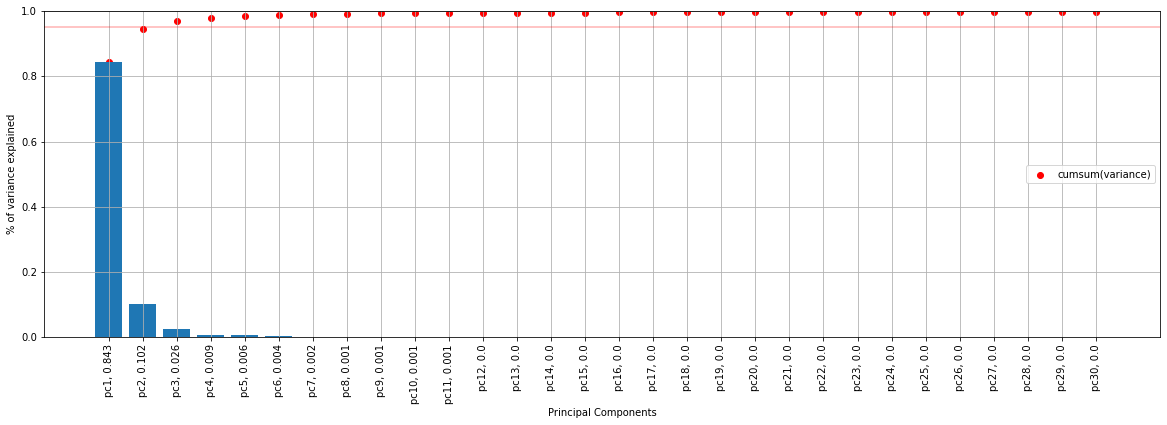

In [21]:
pca_iris.plot_variance_explained(k_comp=30, limit=0.95)

**Zeichne Original und Rekonstruktion für 100 Beispiele** im gleichen Plot

In [22]:
k_components = 5
df_iris_5k_reduced = pca_iris.fit_transform(df_iris_5k, k_components)
df_iris_5k_reduced.shape
#df_iris_5k_reduced[0, :]

VT:  (5, 240) X.T:  (240, 500)


(500, 5)

In [23]:
#X_rekonstrukt = pca_iris.rekonstruktion()
#X_rekonstrukt.shape

In [24]:
np.random.seed(42)

# 100 zufällige Beispiele auswählen
idx_rnd = np.random.randint(0, df_iris_5k.shape[0], 100)

df_iris_100 = df_iris_5k[idx_rnd, :].copy()
df_iris_100_reduced = df_iris_5k_reduced[idx_rnd, :].copy()
print(f'{df_iris_100.shape=}')
print(f'{df_iris_100_reduced.shape=}')

df_iris_100.shape=(100, 240)
df_iris_100_reduced.shape=(100, 5)


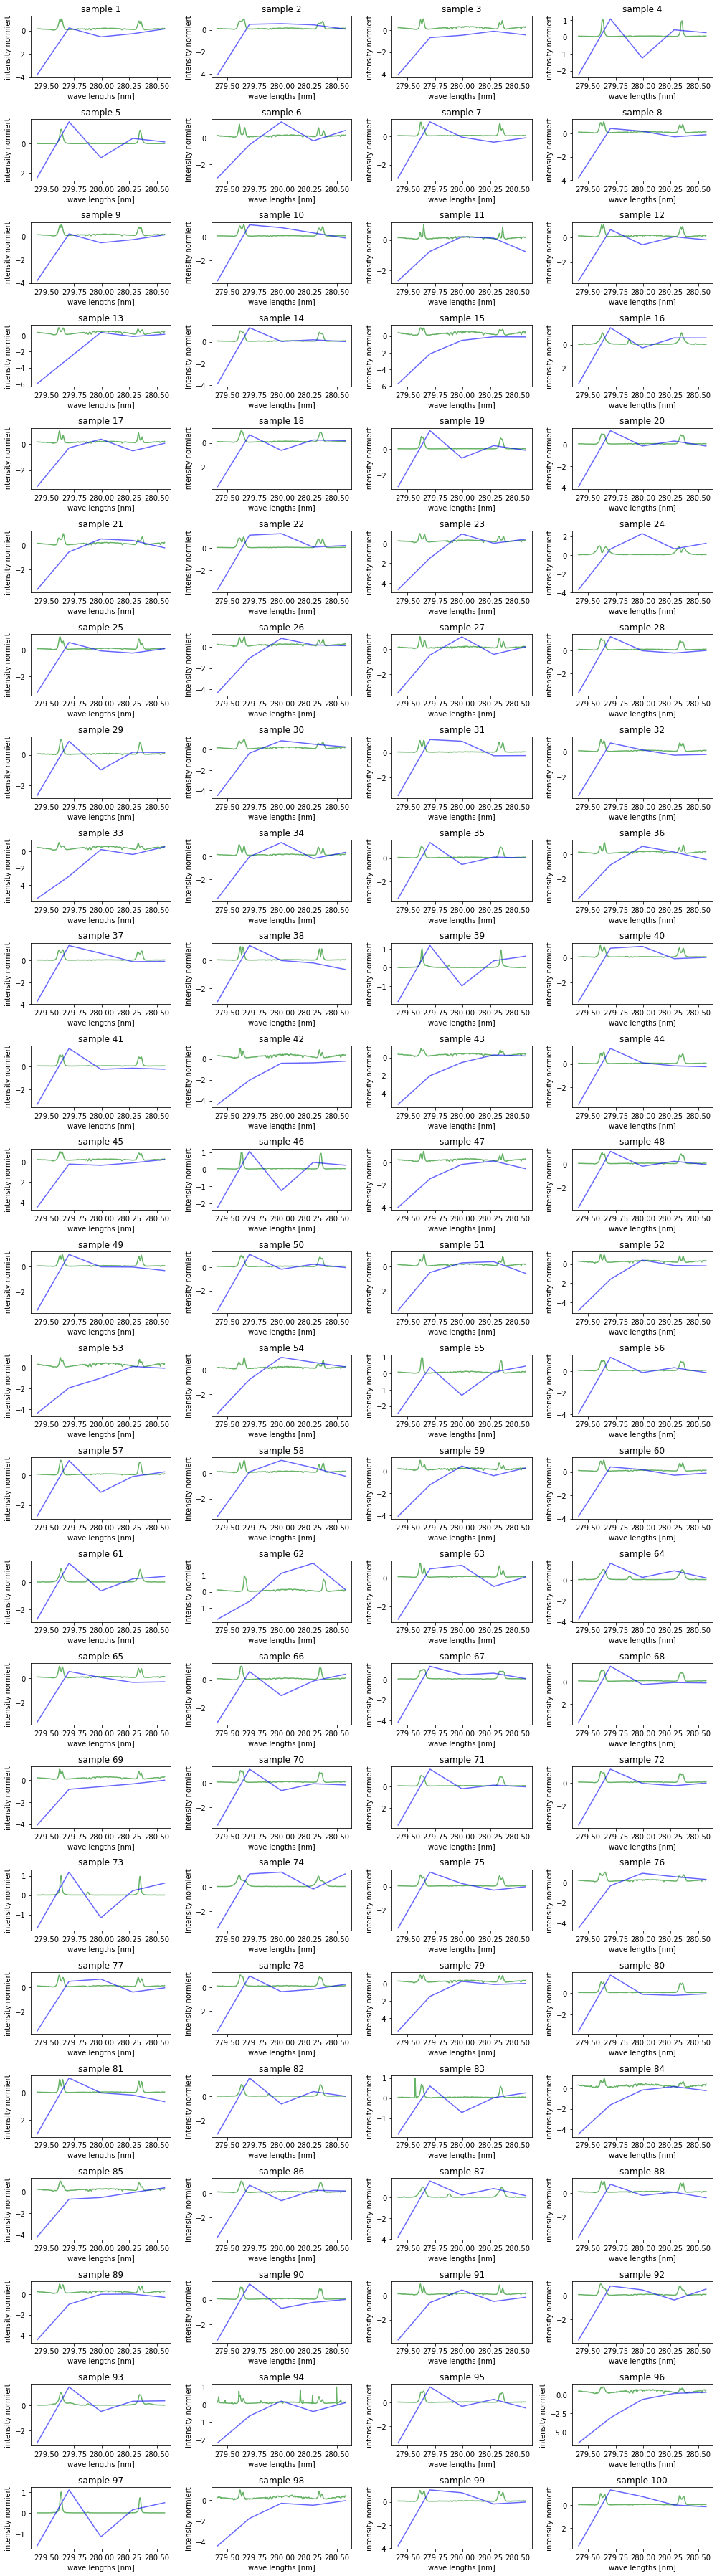

In [25]:
# plote die zufällige 100 Beispiele
fig, ax = plt.subplots(25, 4, figsize=(14,50))
ax = ax.flatten()

# Wellenlänge zwischen 279.414nm und 280.572nm, verwende linspace für 240 Punkte dazwischen
x_label_all = np.linspace(279.414, 280.572, df_iris_100.shape[1])
x_label_reduced = np.linspace(279.414, 280.572, df_iris_100_reduced.shape[1])

for i, data in enumerate(df_iris_100):
    ax[i].plot(x_label_all, df_iris_100[i, :], color='green', alpha=0.6, label='original')
    ax[i].plot(x_label_reduced, df_iris_100_reduced[i, :], color='blue', alpha=0.6, label='rekon')
    ax[i].set_title(f'sample {i+1}')
    ax[i].set_xlabel('wave lengths [nm]')
    ax[i].set_ylabel('intensity normiert')    

#plt.legend()        
plt.tight_layout()
plt.show()

**Projiziere die Spektren auf die ersten beiden Principal Components**

VT:  (2, 240) X.T:  (240, 500)


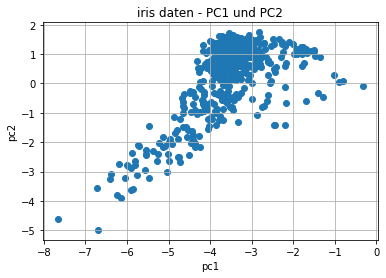

In [26]:
# PCA Analysis
# Drehen der Daten mit den Eigenvektoren
PCA_out_1_2 = pca.fit_transform(df_iris_5k, 2)
#PCA_out_1_2 = PCA_out_1_2[:, :2]

#zeichne der Daten entlang der grössten Principal Komponente
plt.scatter(PCA_out_1_2[:,0],  PCA_out_1_2[:,1])
#plt.ylim(-5, 5)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('iris daten - PC1 und PC2')
plt.grid()
plt.show()

YOUR ANSWER HERE

### Aufgabe 5 (10 Punkte)

Nun wenden wir uns Non-negative Matrix Factorization (NMF) zu.  

Verwende NMF von scikit-learn, um eine Zerlegung der Datenmatrix zu berechnen.  

Entwickle also ein sinnvolles NMF-Modell für den Sonnenspektren Datensatz. Wie kannst du hier die Anzahl Komponenten wählen?

Ein Datenpunkt soll in deinem Ansatz nur durch einen kleinen Teil der Komponenten repräsentiert werden können.
Inwiefern hat dies einen Einfluss auf die Wahl der Regularisierung?  

Welche übergeordneten ML-Entwicklungs- und Model-Selection-Prinzipien kannst du hier einbringen, begründe.

Rekonstruiere die Spektren aus den gefundenen Komponenten und zeichne Original und Rekonstruktion für 100 Beispiele in den gleichen Plot.  

Zeichne die gefundenen Komponenten.  

Wie kannst du visualisieren und aufzeigen, dass die Sonnenspektren tatsächlich nur aus wenigen Komponenten rekonstruiert werden?  


Diskutiere sämtliche Ergebnisse und vergleiche die Resultate mit Aufgabe 3.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Aufgabe 6 - K-Means (8 Punkte)

K-Means ist ein Clustering-Algorithmus. Mit K-Means können wir einen Datensatz in $K$ Gruppen (Cluster) unterteilen. Eine Funktion $C(i) \in \{ 1, \dots, K \}$ ordnet dabei jedem Datenpunkt $i$ einen Cluster $k$ zu. 

Die $K$ Gruppen werden dabei über $K$ Zentroiden, Clustermittelpunkte $\mu_k$, charakterisiert. Datenpunkte (Pixelwerte in unserem Fall) werden dem Zentroiden zugeordnet, der ihnen am nächsten ist. Der K-Means-Algorithmus (siehe unten) findet dabei ein lokales Minimum für die Funktion

$$
J(C) = \sum_{k=1}^{K} \sum_{C(i)=k} ||x^{(i)} - \mu_k||^2
$$

Er minimiert also den summierten quadrierten Abstand der Datenpunkte zu ihrem Zentroiden.  

Da der Algorithmus nur ein lokales Minimum findet, initialisiert man den Algorithmus in der Regel mehrfach und behält am Schluss die Lösung mit dem kleinsten Wert für die Kostenfunktion.

Ein Durchlauf / eine Initialisierung des Algorithmus funktioniert wie folgt:

---

#### K-Means Algorithmus

*Initialisierung*: Wähle $K$ Zentroiden zufällig aus den gegebenen Datenpunkten.

*Schritt 1*: Für gegebene Zentroiden $(\mu_1, .., \mu_k)$ ordne man sämtliche Datenpunkte jeweils jenem Cluster zu, dessen Zentroid dem jeweiligen Datenpunkt am nächsten ist. Also


\begin{eqnarray}
C(i) = \mathsf{argmin}_k ||x^{(i)} - \mu_k||^2
\end{eqnarray}


*Schritt 2*: Für eine gegebene Cluster-Zuordnung $C$ minimiere man die 'Gesamt-Cluster-Varianz' durch Aktualisieren der Zentroiden mit:


\begin{eqnarray}
\mu_k = \frac{1}{N_k} \sum_{C(i)=k}x^{(i)}
\end{eqnarray}

$N_k$ sind die Anzahl Datenpunkte, die k zugeordnet sind.  

*Schritt 3*: Man wiederhole die Schritte 1 und 2 bis sich die Zentroiden nicht mehr verändern oder der Wert der Funktion $J(C)$ sich kaum mehr verbessert.

---

Vervollständige die folgende Klasse, welche den K-Means-Algorithmus umsetzen soll.  

Zeige anhand eines konstruierten Beispiels, dass dein Algorithmus zuverlässig funktioniert.  
Verwende zur Konstruktion des Beispiels `sklearn.datasets.make_blobs`.

In [ ]:
# If you want, you can use the following function to efficiently compute pairwise distances.
# Read the docstring to learn how to use it.
from scipy.spatial.distance import cdist

class KMeans(object):
    
    def __init__(self, k=3, n_inits=10, random_seed=None):
        '''KMeans clustering algorithm.
        
        Parameters
        ----------
        k: number of clusters
        n_intis: number of initializations
        '''
        # Parameters
        self.k = k
        self.n_inits = n_inits
        self.random_seed = None
        
        # The following attributes will be computed through execution of the
        # KMeans algorithm in the fit method.
        self.centroids_ = None
        self.labels_ = None
        self.cost_ = None
        self.num_iterations_ = None
    
    
    def fit(self, X):
        '''Clusters the dataset X into k clusters.
        '''                
        # YOUR CODE HERE
        raise NotImplementedError()
        return self
  
    def cost_function(self, X):
        '''Computes the KMeans cost function for a given dataset X.
        '''
        # YOUR CODE HERE
        raise NotImplementedError()
    
    def predict(self, X):
        '''Assigns each data point in X to the closest cluster.
        
        Can only be used after the clustering algorithm has been executed.
        '''
        # YOUR CODE HERE
        raise NotImplementedError()
  
    # further methods go here
    # YOUR CODE HERE
    raise NotImplementedError()


### Aufgabe 7 - K-Means auf Sonnenspektren (7 Punkte)

Beschreibe nun in Worten was es bedeutet, diese Spektren zu clustern.

Nimm ein Clustering mit deiner Implementierung von KMeans der Sonnenspektren vor.  

Bestimme einen sinnvollen Wert für $K$. Erläutere dabei dein Vorgehen und diskutiere auch alternative Möglichkeiten dafür.  

Zeichne die Zentroiden.  

Beschreibe und diskutiere deine Resultate.  
Lege dabei Unterschiede von Zentroiden und Principal Components, sowie NMF Komponenten aus der ersten ule Mini-Challenge dar.  

Könnte man K-Means auch als Matrizen-Zerlegung betrachten? Wie?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Aufgabe 8 (5 Punkte)

Visualisiere die Cluster im Raum der ersten beiden Principal Components zusammen mit ihren Zentroiden.  

Beschreibe und diskutiere deine Resultate. Entsprechen sie deinen Erwartungen?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Aufgabe 9 (4 Punkte)

Beschreibe abschliessend die drei hier verwendeten *Unsupervised Learning*-Methoden miteinander. Was zeichnet sie aus, was unterscheidet sie?

YOUR ANSWER HERE